In [ ]:
import pandas as pd

df = pd.read_csv("mall_customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Male,31,17,40


In [ ]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              50 non-null     int64 
 1   Gender                  50 non-null     object
 2   Age                     50 non-null     int64 
 3   Annual Income (k$)      50 non-null     int64 
 4   Spending Score (1-100)  50 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


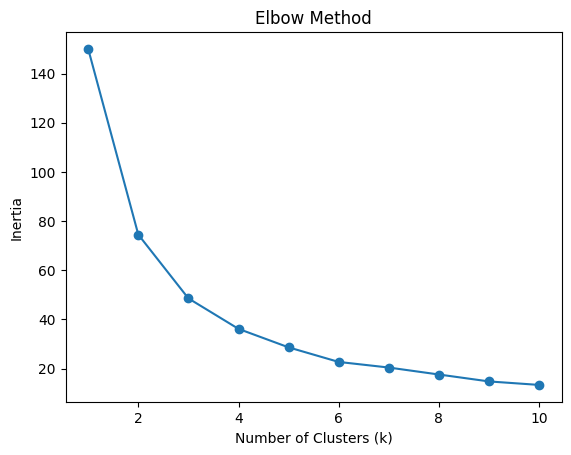

In [ ]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


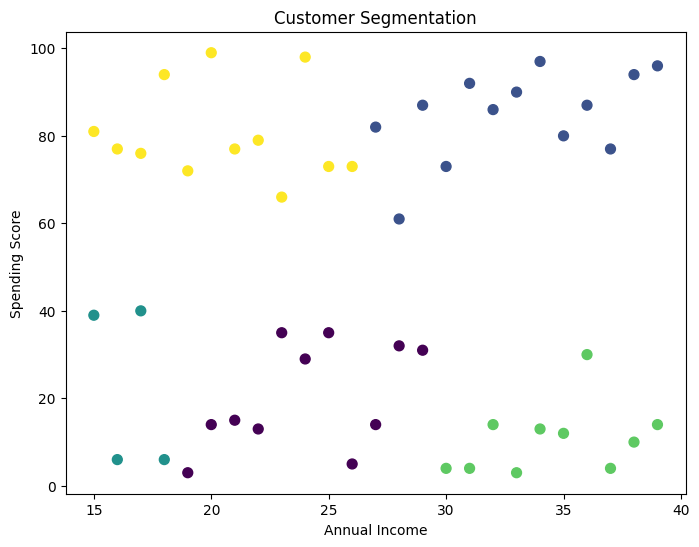

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,19.0,48.454545,24.0,20.545455
1,38.0,24.307692,33.0,84.769231
2,4.0,26.250000,16.5,22.750000
3,40.0,50.900000,34.5,10.800000
4,13.0,25.916667,20.5,80.416667


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters
df.head()

plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['Cluster'], s=50)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation')
plt.show()

# IMPORTANT — Only this line for cluster summary
df.groupby('Cluster').mean(numeric_only=True)

